In [62]:
import numpy as np
import networkx as nx

#generalised laplacian matrix using social distance approach
def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [63]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def Genlaplacian_laplace(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [64]:
#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter
def Genlaplacian_mellin(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [65]:
import random

rand_lst = [ random.randint(1, 10) for i in range(0,10)]
print(rand_lst)

[7, 10, 10, 10, 5, 10, 5, 4, 9, 10]


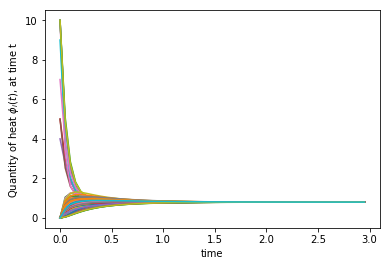

In [66]:

###Mellin transform diffusion for Barabasi network####

import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools

n=100
m=4
G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
while (nx.is_connected(G)==False):                # check if network is connected
    G = nx.barabasi_albert_graph(n, m, seed=None)

Deg_lst = list(nx.degree_centrality(G).values())
sel_index = np.argsort(Deg_lst)[-10:]
phi_0 = [0]*n


j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1


L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,3.0,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

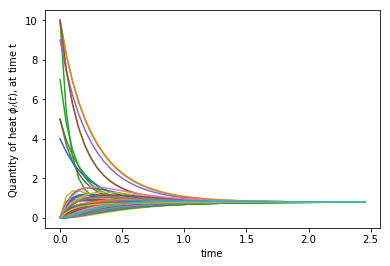

In [67]:

phi_0 = [0]*n

j=0
for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = rand_lst[j]
    j = j+1

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions

D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

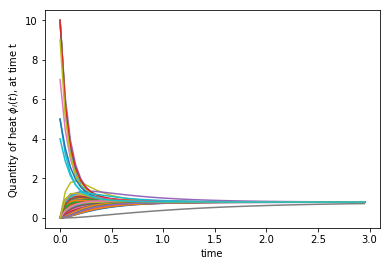

In [68]:

###Mellin transform diffusion for ER network####

import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools

n=100
p =0.09
G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
while (nx.is_connected(G)==False):                      # check if network is connected
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)

Deg_lst = list(nx.degree_centrality(G).values())
sel_index = np.argsort(Deg_lst)[-10:]
phi_0 = [0]*n

j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1



L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,3.0,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

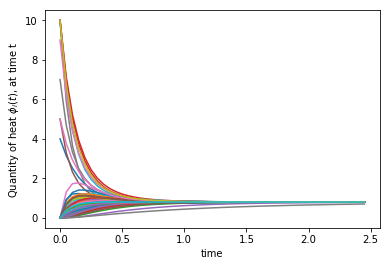

In [69]:

phi_0 = [0]*n

j=0
for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = rand_lst[j]
    j = j+1


L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions

D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

In [70]:
l1 = [1,2,3]
l2 = [2,4,5]
ll =l1+l2
ll

[1, 2, 3, 2, 4, 5]

In [71]:
ll[-2:]

[4, 5]